# Test script
This is designed to allow me to test the api and the accuracy of the tensorflow serving model. 

This was a preliminary step before translating this code into the front end post request

In [227]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg


In [228]:
img_dir = "./testimages"

In [229]:
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels
BATCH_SIZE = len(os.listdir(img_dir+"/cats"))+len(os.listdir(img_dir+"/dogs"))   
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=img_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 167 images belonging to 2 classes.


In [230]:
classes = {0: "cat", 1:"dog", 2: "other"} # from alphabetical

In [231]:
idx = 2

In [232]:
batch = val_data_gen[0] # val_data_gen[batch number][image number][channel]
"""
batch = val_data_gen [pick batch number]
batch[0][N] = image data for image N
batch [1][N] = labels fo image N
"""
images = batch[0]
true_labels = batch[1]

In [233]:
len(true_labels)

167

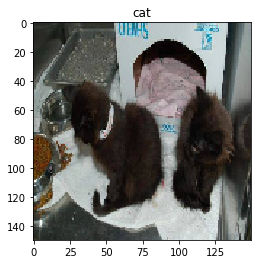

In [234]:
def plotimage(idx):
    plt.imshow(images[idx])
    plt.title(classes[true_labels[idx]])
plotimage(2)


In [235]:
import json

In [236]:
data = json.dumps({"signature_name": "serving_default", "instances": images.tolist()})
print(data[:300])

{"signature_name": "serving_default", "instances": [[[[0.2039215862751007, 0.14509804546833038, 0.16470588743686676], [0.0941176563501358, 0.07058823853731155, 0.08627451211214066], [0.0313725508749485, 0.027450982481241226, 0.0470588281750679], [0.019607843831181526, 0.02352941408753395, 0.03921568


In [237]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/catsAndDogs/versions/1:predict', data=data, headers=headers)
j = r.json()
print(j.keys())
print(j)

dict_keys(['predictions'])
{'predictions': [[0.784208834, -0.744726181], [0.452635527, -0.328591764], [0.289228618, -0.301582813], [1.48088384, -1.06654501], [0.17468977, -0.158825099], [0.37144202, -0.175865352], [1.59883153, -1.12462842], [-2.49846697, 2.19468045], [1.82338405, -1.38163483], [-1.33008325, 1.31883395], [1.2273972, -0.977164626], [-1.20315647, 0.979639351], [1.30709863, -0.976186216], [1.5872035, -1.12605357], [-0.776943564, 0.64592725], [0.0596992224, -0.107646577], [-1.05730617, 1.16419852], [-0.182398945, 0.169014767], [-0.0825417861, 0.0245272964], [1.3958118, -1.00379], [-0.972145379, 1.01507807], [0.811979413, -0.658449471], [0.586949289, -0.346015036], [-0.0709849671, 0.00330920517], [-0.981141329, 0.793336391], [-1.81328583, 1.6883831], [0.73923707, -0.471919835], [1.18956256, -1.03681993], [-0.0555211306, 0.0697680563], [-1.59636438, 1.4958632], [-0.340782017, 0.231174693], [-0.142049611, 0.149247], [1.15615356, -0.904556751], [-2.33885217, 1.7293613], [1.3870

In [238]:
pred = np.array(j['predictions'])
pred =pred.argmax(axis=1) # just get the label it has most confidence in
pred = [classes[i] for i in pred]
pred # this is the predcitions back from the model

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',


In [239]:
true_labels = [classes[i] for i in true_labels]
true_labels # these are the real labels of our data

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',


In [240]:
correct = 0
for i in range(len(pred)):
    if pred[i] == true_labels[i]:
        correct +=1
print("accuracy: " ,100*round(1.0*correct/(len(pred)), 2), "%")

accuracy:  85.0 %


0.0